In [12]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs
import pandas as pd 

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [13]:
data = sio.loadmat('AMZN_20141103.mat')

In [14]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

In [15]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

In [16]:
a = np.random.standard_normal((9,4))
a

array([[-1.41844531, -0.57423737,  1.86588516, -0.19929235],
       [-2.04573103,  0.32259023, -0.42922776, -0.00476709],
       [-0.80705222, -0.45137929,  1.25223178, -0.72046404],
       [-0.84281417, -2.80262975, -2.05350494, -0.15673119],
       [-1.57299953, -0.18470141,  1.14699457,  0.61636883],
       [ 1.6172595 , -0.77536724, -0.54217332, -0.68563263],
       [-0.58697149, -0.04401763,  0.15534249, -0.02605522],
       [-1.34819706,  1.31146846, -3.11454747, -0.16862495],
       [ 0.62971831, -0.32428944, -1.53946558, -1.03523714]])

In [17]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-1.418445,-0.574237,1.865885,-0.199292
1,-2.045731,0.322590,-0.429228,-0.004767
2,-0.807052,-0.451379,1.252232,-0.720464
3,-0.842814,-2.802630,-2.053505,-0.156731
4,-1.573000,-0.184701,1.146995,0.616369
5,1.617259,-0.775367,-0.542173,-0.685633
6,-0.586971,-0.044018,0.155342,-0.026055
7,-1.348197,1.311468,-3.114547,-0.168625
8,0.629718,-0.324289,-1.539466,-1.035237


In [18]:
df = pd.DataFrame(midprice)
df

,0
0,306.235
1,306.350
2,306.500
3,306.500
4,306.460
...,...
233995,305.705
233996,305.705
233997,305.705
233998,305.705


In [19]:
import pandas as pd
df = pd.DataFrame(microprice)
df

,0
0,306.238886
1,306.345056
2,306.476517
3,306.629328
4,306.617167
...,...
233995,305.701038
233996,305.701038
233997,305.701038
233998,305.701038


In [20]:
df.describe()

,0
count,234000.000000
mean,306.230662
std,0.972256
min,303.251538
25%,305.521239
50%,306.424921
75%,306.970000
max,307.987500


In [35]:
df = pd.DataFrame(spread)
df

,0
0,0.01
1,0.08
2,0.38
3,0.38
4,0.46
...,...
233995,0.01
233996,0.01
233997,0.01
233998,0.01


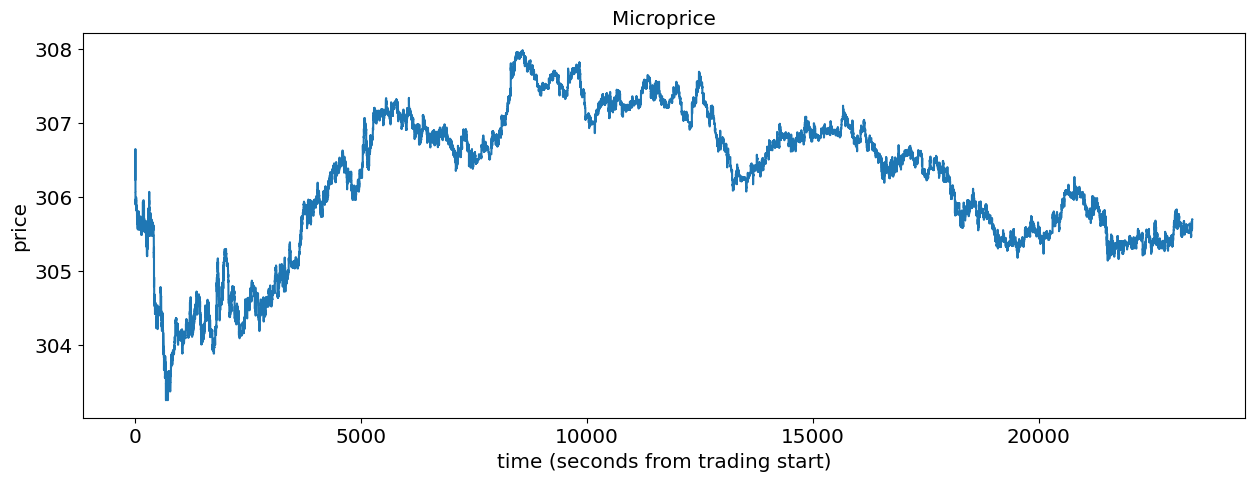

In [21]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

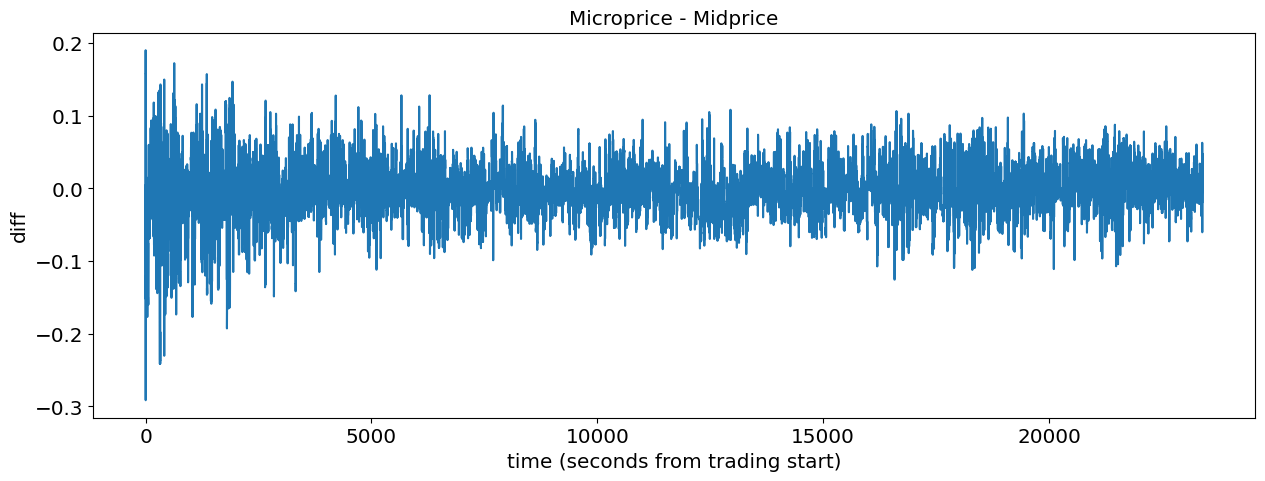

In [22]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

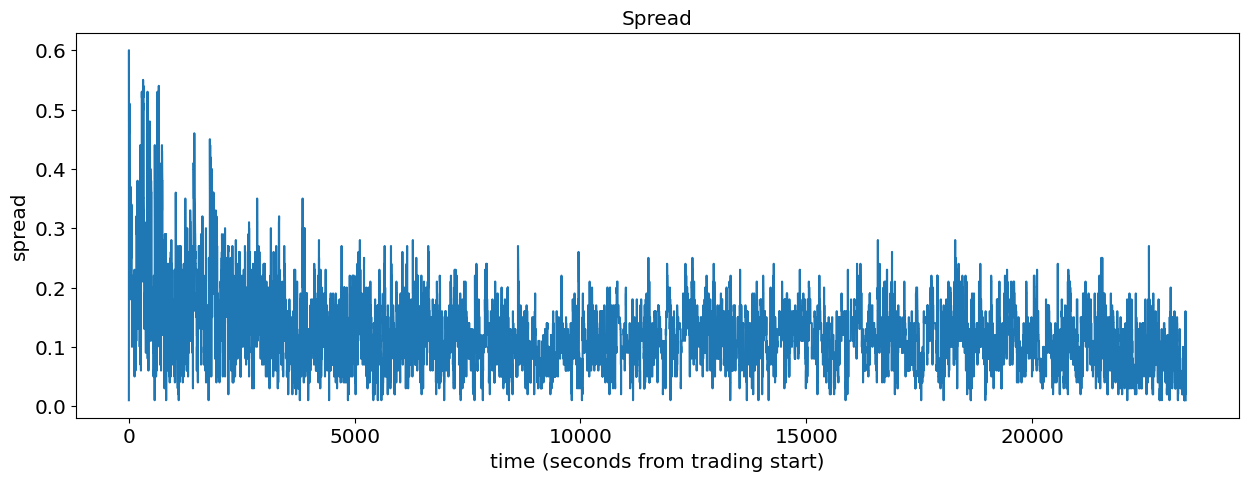

In [23]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

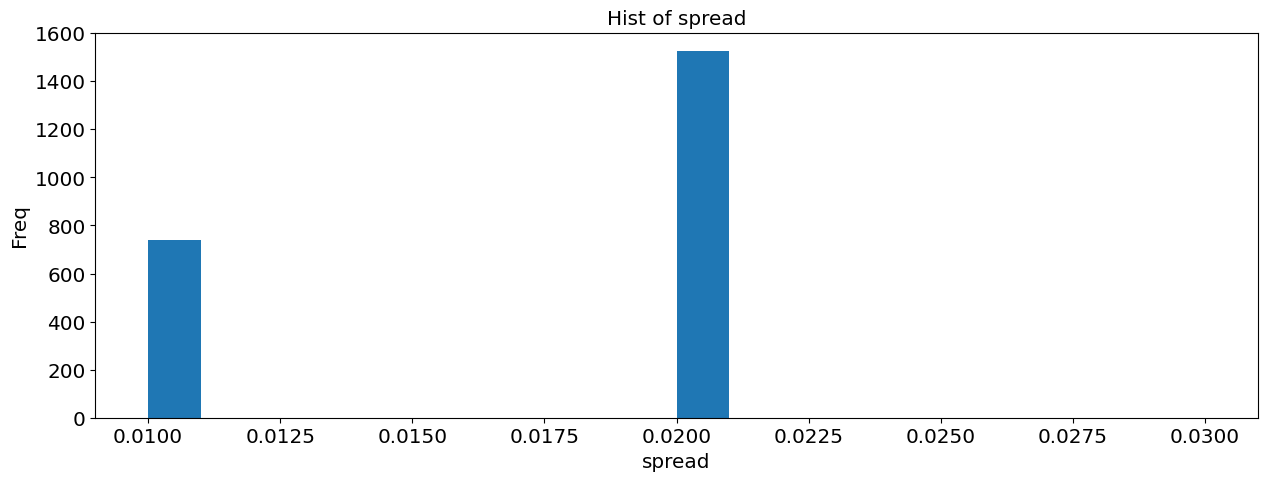

In [24]:
plt.hist(spread,bins=[0.01,0.02,0.03], width=0.001,align='mid') 
plt.title("Hist of spread")
plt.xlabel(r'spread')
plt.ylabel('Freq')
plt.show()

In [25]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

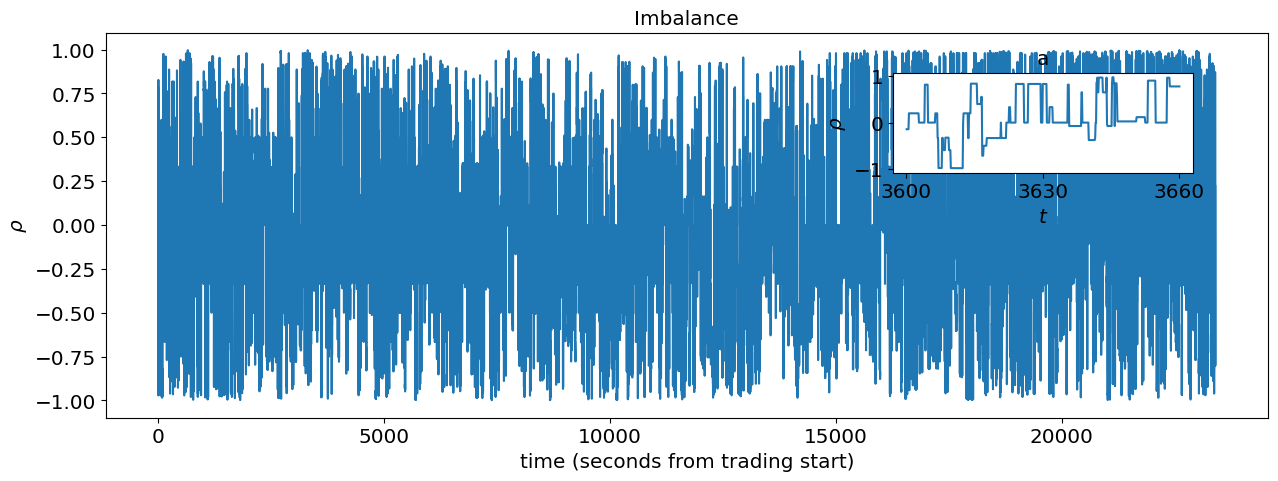

In [26]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()


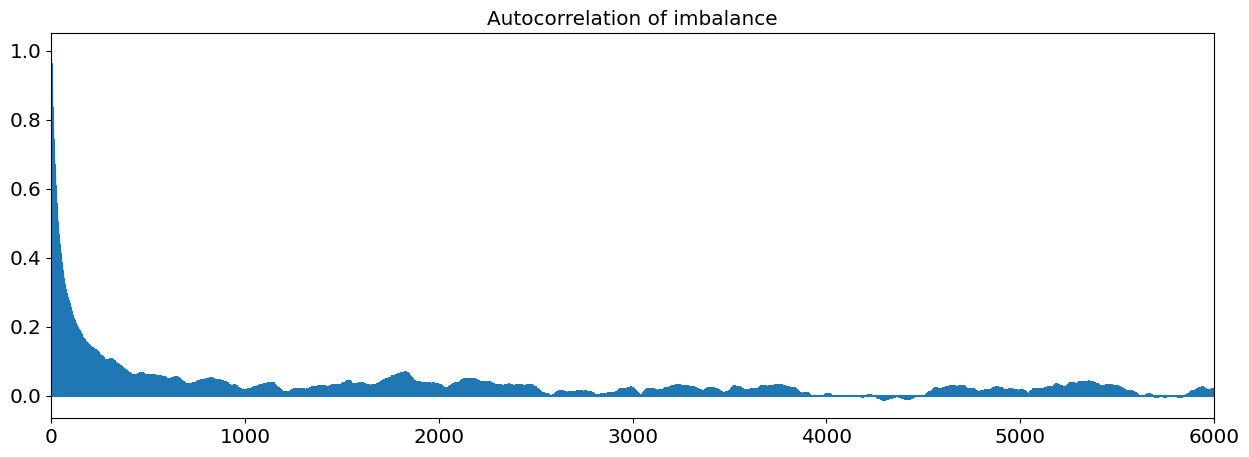

In [27]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

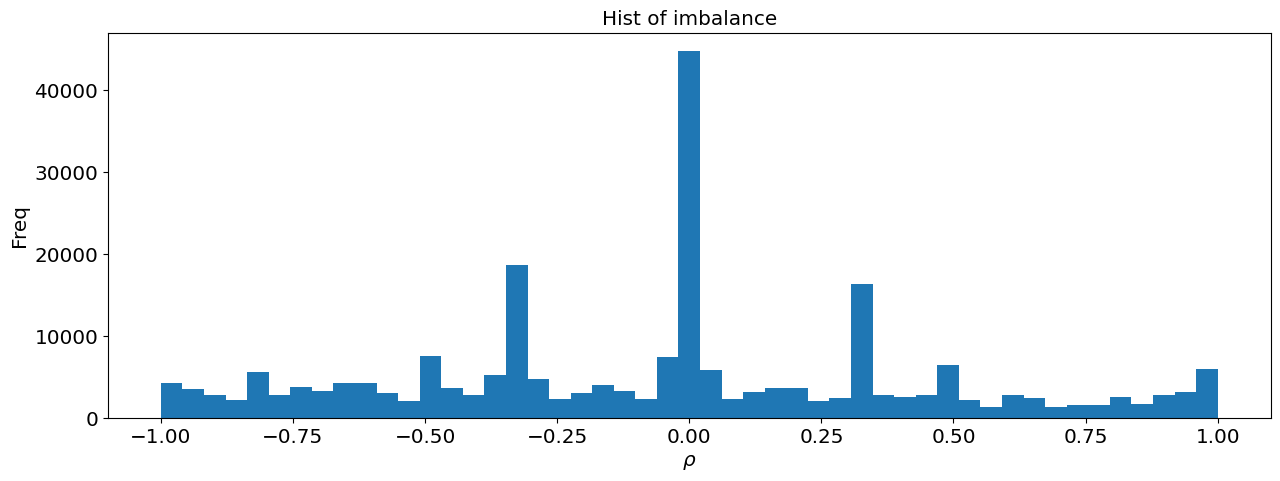

In [28]:
plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Hist of imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()


In [29]:
rho_MO = (MO[:,3]-MO[:,4])/(MO[:,3]+MO[:,4])

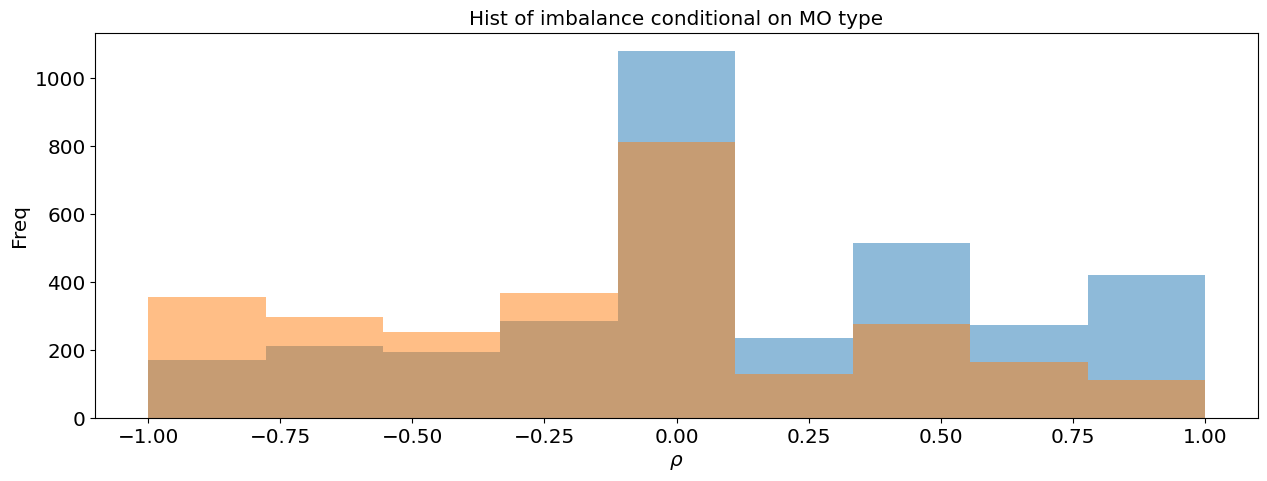

In [30]:
plt.hist(rho_MO[MO[:,7]==-1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.hist(rho_MO[MO[:,7]==+1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.title("Hist of imbalance conditional on MO type")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

In [31]:
pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Import necessary libraries.
import numpy as np
import import_ipynb
import Liquidation_Permanent_Price_Impact_helper as lppi_helpers

In [33]:
# Parameter settings
T = 1
Ndt = 6.5 * 3600
dt = T / Ndt
t = np.arange(0, T + dt, dt)

k = 0.003
b = 0.004

tau = T - t
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

myphi = np.array([10e-10, 0.001, 0.01, 0.1])
symb = np.array(["o", "*", "+", "^"])

alpha = 100

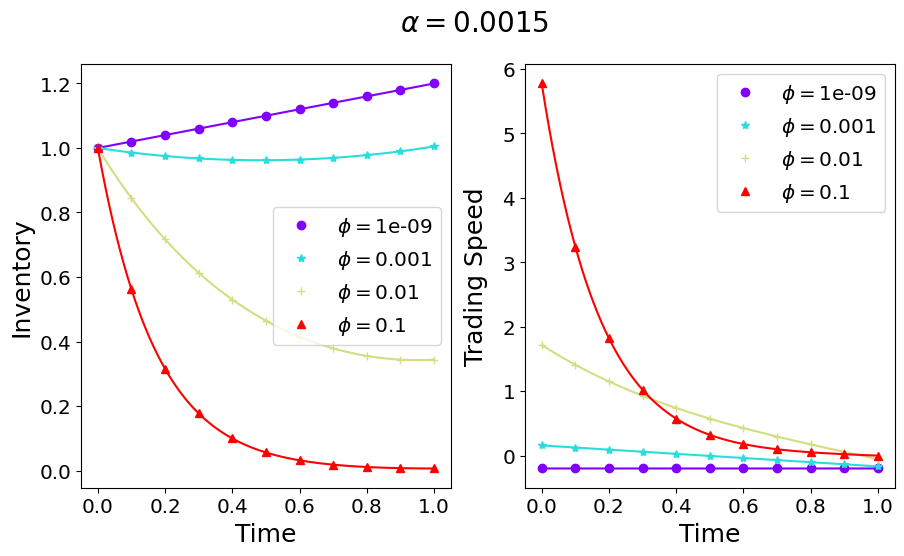

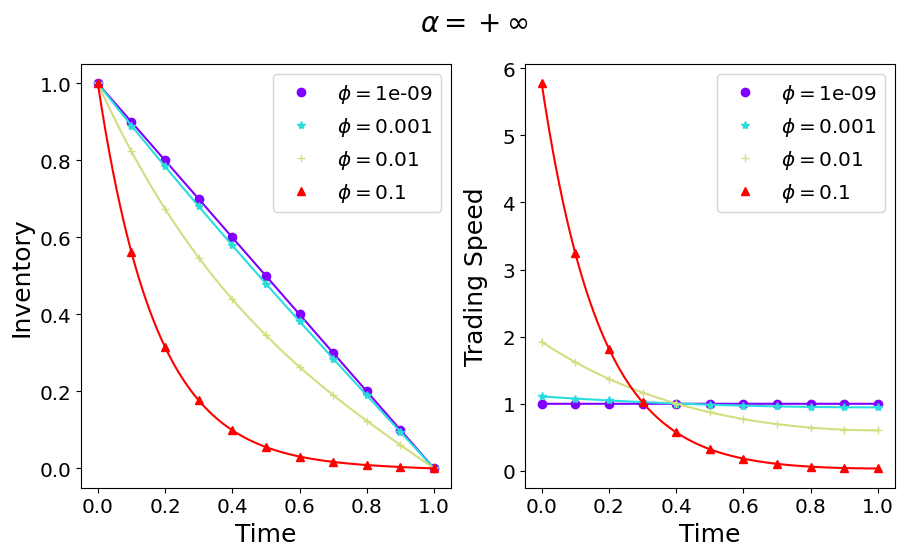

In [34]:
# Fig 6.2 of Page 148
lppi_helpers.plot_inventory_trading_speed(0.0015, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.0015$")
lppi_helpers.plot_inventory_trading_speed(100, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")